# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#  ML Models 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [3]:
# Import Data

In [4]:
df = pd.read_csv("student-mat.csv")

In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
# Analysis

In [6]:
print('total number of students:',len(df))

total number of students: 395


Total Number Of student is 395

In [7]:
# Checking for Grade G3
df['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

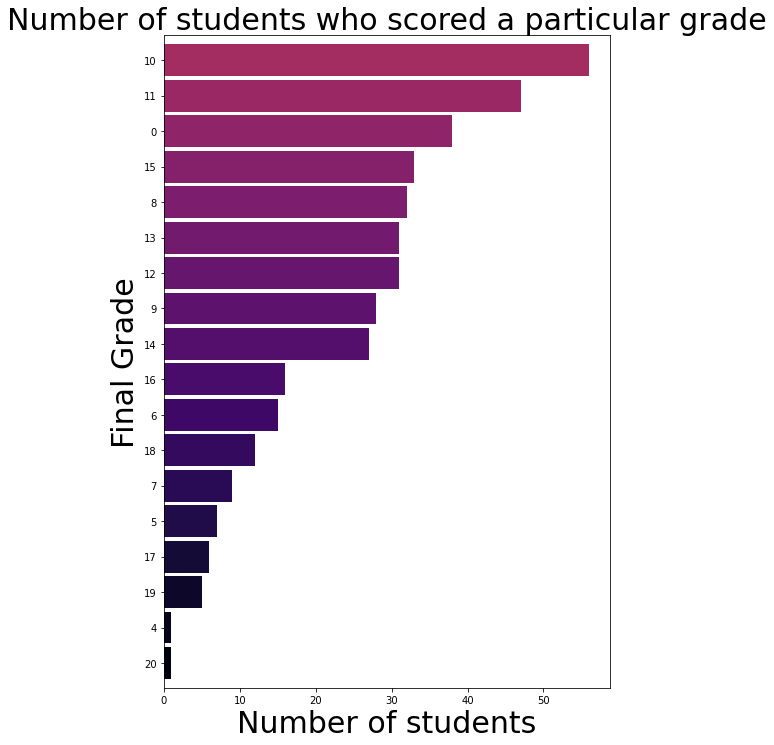

In [10]:
plt.subplots(figsize=(8,12))
grade_counts = df['G3'].value_counts().sort_values().plot.barh(width=.9,color=sb.color_palette('inferno',40))
grade_counts.axes.set_title('Number of students who scored a particular grade',fontsize=30)
grade_counts.set_xlabel('Number of students', fontsize=30)
grade_counts.set_ylabel('Final Grade', fontsize=30)
plt.show()

# Final grade distribution

C:\Users\hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


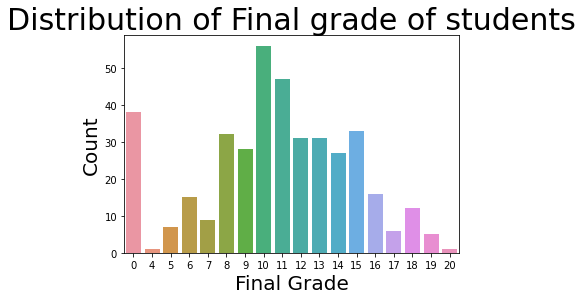

In [13]:
student = sb.countplot(df['G3'])
student.axes.set_title('Distribution of Final grade of students', fontsize = 30)
student.set_xlabel('Final Grade', fontsize = 20)
student.set_ylabel('Count', fontsize = 20)
plt.show()

# Checking for null values

In [14]:
df.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

No column as null values

# gender Analysis

In [21]:
male_studs = len(df[df['sex'] == 'M'])
female_studs = len(df[df['sex'] == 'F'])
print('Number of male students:',male_studs)
print('Number of female students:',female_studs)

Number of male students: 187
Number of female students: 208


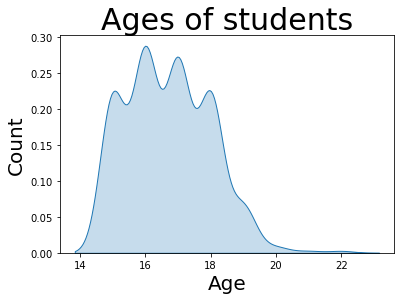

In [24]:
# Distribution with AGE 
student = sb.kdeplot(df['age'], shade=True)
student.axes.set_title('Ages of students', fontsize = 30)
student.set_xlabel('Age', fontsize = 20)
student.set_ylabel('Count', fontsize = 20)
plt.show()

# Relation b/w finalgrade and age

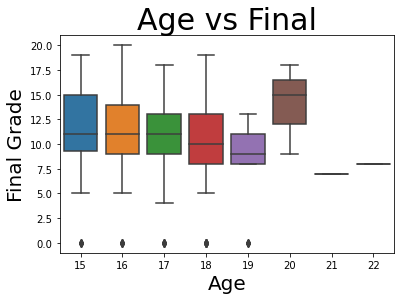

In [27]:
student = sb.boxplot(x='age', y='G3', data=df)
student.axes.set_title('Age vs Final', fontsize = 30)
student.set_xlabel('Age', fontsize = 20)
student.set_ylabel('Final Grade', fontsize = 20)
plt.show()

# Plotting the distribution rather than statistics would help us better understand the data

C:\Users\hi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


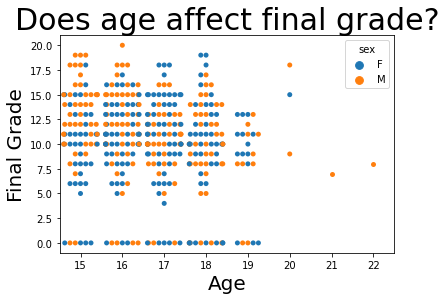

In [28]:
student= sb.swarmplot(x='age', y='G3',hue='sex', data=df)
student.axes.set_title('Does age affect final grade?', fontsize = 30)
student.set_xlabel('Age', fontsize = 20)
student.set_ylabel('Final Grade', fontsize = 20)
plt.show()

Age 20 has only 3 data points hence the inconsistency in statistics.
Otherwise there seems to be no clear relation of age or gender with final grade

## Count of students from urban and rural areas

C:\Users\hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


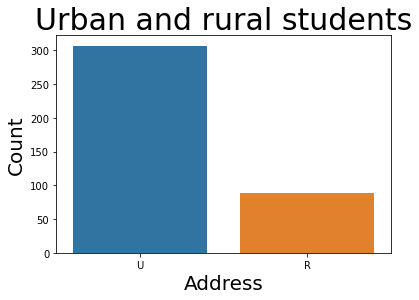

In [30]:
student = sb.countplot(df['address'])
student.axes.set_title('Urban and rural students', fontsize = 30)
student.set_xlabel('Address', fontsize = 20)
student.set_ylabel('Count', fontsize = 20)
plt.show()

it is clear from above graph most of the student from the Urban

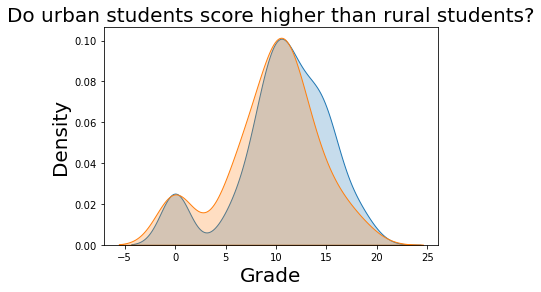

In [32]:
# Grade distribution by address
sb.kdeplot(df.loc[df['address'] == 'U', 'G3'], label='Urban', shade = True)
sb.kdeplot(df.loc[df['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?', fontsize = 20)
plt.xlabel('Grade', fontsize = 20);
plt.ylabel('Density', fontsize = 20)
plt.show()

The graph shows that on there is not much difference between the scores based on location.

# Reason to choose this school

C:\Users\hi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


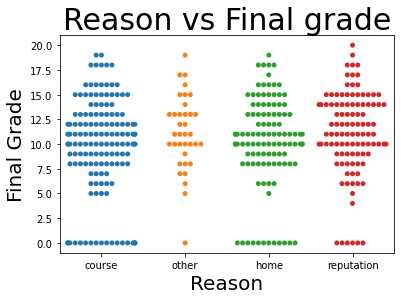

In [34]:
student = sb.swarmplot(x='reason', y='G3', data=df)
student.axes.set_title('Reason vs Final grade', fontsize = 30)
student.set_xlabel('Reason', fontsize = 20)
student.set_ylabel('Final Grade', fontsize = 20)
plt.show()

# correlation

In [42]:
df.corr()['G3'].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

<AxesSubplot:>

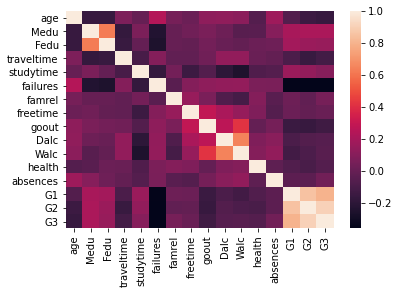

In [46]:
sb.heatmap(df.corr())

# going out with friends

C:\Users\hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


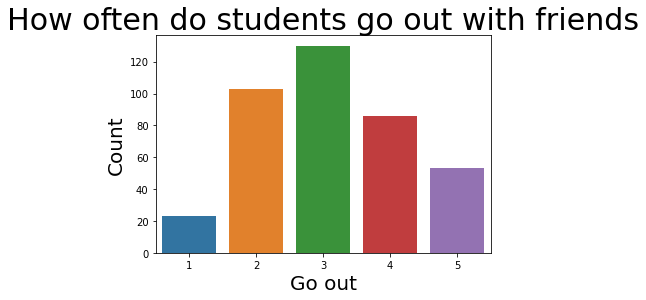

In [50]:
student = sb.countplot(df['goout'])
student.axes.set_title('How often do students go out with friends', fontsize = 30)
student.set_xlabel('Go out', fontsize = 20)
student.set_ylabel('Count', fontsize = 20)
plt.show()